In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

## Пример переобучения

In [83]:
def generate_data(N, interval=(0, 1)):
    return np.linspace(interval[0], interval[1], N), \
           np.random.normal(100, 10, size=N)

In [109]:
def transform(X, N):
    return np.vstack([X ** k for k in range(1, N + 1)]).T

In [103]:
def apply_model(model, X, N):
    prepared = transform(X, N)
    return model.predict(prepared)

In [112]:
def fit_model(model, X, Y, N):
    prepared_X = transform(X, N)
    model.fit(prepared_X, Y)

In [121]:
def overfitting(N, X_start, X_end):
    X, Y = generate_data(N, interval=(X_start, X_end))
    
    model = LinearRegression(fit_intercept=True)
    
    fit_model(model, X, Y, N)
    
    X_show = np.linspace(X_start, X_end, 100)
    Y_pred = apply_model(model, X_show, N)
    
    print("R^2 score:", r2_score(apply_model(model, X, N), Y))
    
    _ = plt.figure(figsize=(10, 6))
    plt.scatter(X_show, Y_pred, alpha=0.3, color='red')
    plt.plot(X_show, Y_pred, label="Predict", linestyle='--', color='red')
    plt.scatter(X, Y, label="Data item", color='blue')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Model learning result")
    plt.legend()
    plt.grid()
    plt.savefig("LinearRegression_model_overfitting.png", dpi=300)

In [131]:
def with_validation(N, X_start, X_end):
    X, Y = generate_data(N, interval=(X_start, X_end))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
    
    model = LinearRegression(fit_intercept=True)
    
    fit_model(model, X_train, Y_train, N)
    
    X_show = np.linspace(X_start, X_end, 100)
    Y_pred = apply_model(model, X_show, N)
    
    print("R^2 train score:", r2_score(apply_model(model, X_train, N), Y_train))
    print("R^2 test score:", r2_score(apply_model(model, X_test, N), Y_test))
    
    _ = plt.figure(figsize=(10, 6))
    plt.scatter(X_show, Y_pred, alpha=0.3, color='red')
    plt.plot(X_show, Y_pred, label="Predict", linestyle='--', color='red')
    plt.scatter(X_train, Y_train, label="Train data", color='blue')
    plt.scatter(X_test, Y_test, label="Test data", color='green')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Model learning result")
    plt.legend()
    plt.grid()
    plt.savefig("LinearRegression_model_overfitting.png", dpi=300)

In [132]:
N = 5
X_start, X_end = 0, 100

R^2 score: 1.0


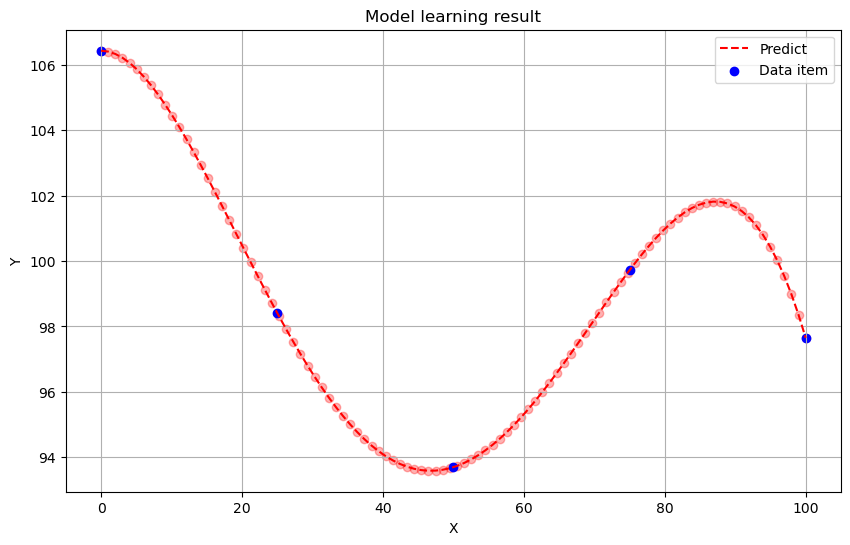

In [133]:
overfitting(N, X_start, X_end)

R^2 train score: 1.0
R^2 test score: -0.7975315469976247


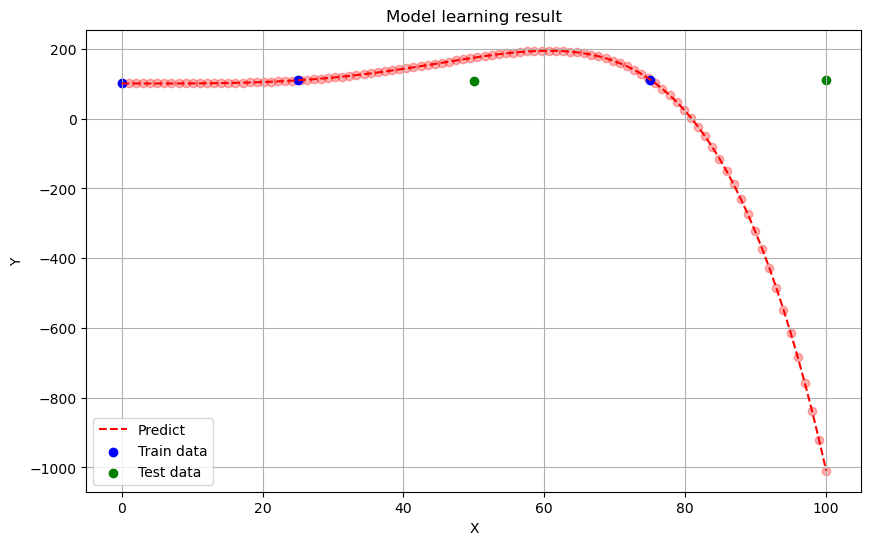

In [134]:
with_validation(N, X_start, X_end)